In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sidetable as stb
import numpy as np
import seaborn as sns

In [5]:
df1 = pd.read_csv('../data/books_25_pages_author_info_description_nmf.csv',skipinitialspace=True)
df1 = df1.rename(columns = lambda x: x.strip())
value_author_num_unique_books = df1['author_num_unique_books'].values
df1 = df1.drop('author_num_unique_books',axis=1)
df1.insert(loc=8,column='author_num_unique_books',value=value_author_num_unique_books)
df1.head()

,book_reference,author_names,avg_rating,num_ratings,year_published,book_title,book_isbn,book_review_count,author_num_unique_books,kindle_price,...,topic 10,topic 11,topic 12,topic 13,topic 14,topic 15,topic 16,topic 17,topic 18,topic 19
0,/book/show/28257707-the-subtle-art-of-not-givi...,Mark Manson,3.94,515636,2016.0,The Subtle Art of Not Giving a F*ck,NaN,33082.0,36.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,/book/show/4865.How_to_Win_Friends_and_Influen...,Dale Carnegie,4.20,600309,1936.0,How to Win Friends and Influence People,NaN,15121.0,396.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,/book/show/36072.The_7_Habits_of_Highly_Effect...,Stephen R. Covey,4.12,517025,1989.0,The 7 Habits of Highly Effective People,9.780743e+12,10277.0,505.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/book/show/12609433-the-power-of-habit,Charles Duhigg,4.10,337512,2012.0,The Power of Habit,9.781400e+12,16950.0,7.0,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,/book/show/22318578-the-life-changing-magic-of...,Marie Kond\xc5\x8d,3.84,275462,2011.0,The Life-Changing Magic of Tidying Up,9.781608e+12,27998.0,18.0,9.99,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
#[print(i) for i in df1.columns]

In [10]:
#drop unimportant columns
df2 = df1.drop(columns=['book_reference','author_names','book_title','author_link','genre_unfinished','book_isbn'])
df2.head()

,year_published,book_review_count,book_description,genre_20th-century,genre_21st-century,genre_abuse,genre_academic,genre_activism,genre_adoption,genre_adult,...,topic 10,topic 11,topic 12,topic 13,topic 14,topic 15,topic 16,topic 17,topic 18,topic 19
0,2016.0,33082.0,Alternate cover edition of ISBN 9780062457738I...,0,0,0,0,0,0,144,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1936.0,15121.0,ISBN 9780671723651 moved to this edition.You c...,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1989.0,10277.0,When Stephen Covey first released The Seven Ha...,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012.0,16950.0,A young woman walks into a laboratory. Over th...,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2011.0,27998.0,Despite constant efforts to declutter your hom...,0,0,0,0,0,0,214,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# check NaN values
df2.loc[:,['avg_rating','num_ratings','year_published','book_review_count','kindle_price','author_num_unique_books']].stb.missing()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['kindle_price', 'author_num_unique_books'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [11]:
# drop rows where kindle_price or book_review_count or year_pubished are NaN because they are important values
df3 = df2.dropna()
len(df3.index)

544

count    544.000000
mean      10.116471
std        4.220110
min        0.000000
25%        8.327500
50%        9.990000
75%       12.990000
max       39.990000
Name: kindle_price, dtype: float64

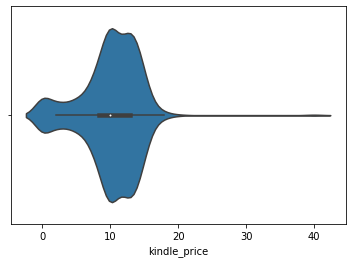

In [14]:
# explore kindle_price
sns.violinplot(x=df3["kindle_price"])
df3['kindle_price'].describe()

In [17]:
# drop books with price zero because they actually have greater price #TODO
df4 = df3[df3['kindle_price']>2]
len(df4.index)

501

<AxesSubplot:xlabel='kindle_price'>

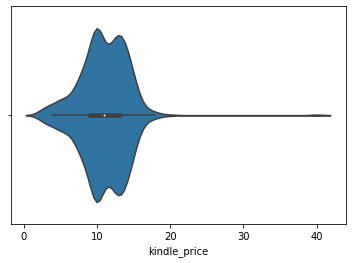

In [18]:
sns.violinplot(x=df4["kindle_price"])

count      501.000000
mean      1419.125749
std       3198.052963
min         26.000000
25%        248.000000
50%        520.000000
75%       1163.000000
max      33024.000000
Name: book_review_count, dtype: float64

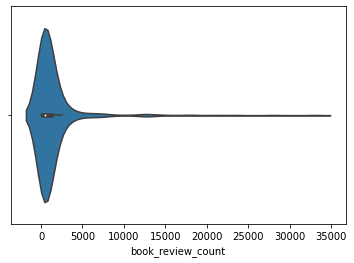

In [19]:
# explore book_review_count
sns.violinplot(x=df4["book_review_count"])
df4['book_review_count'].describe()

count       501.000000
mean      22605.668663
std       67497.512108
min         562.000000
25%        2939.000000
50%        6396.000000
75%       16490.000000
max      945306.000000
Name: num_ratings, dtype: float64

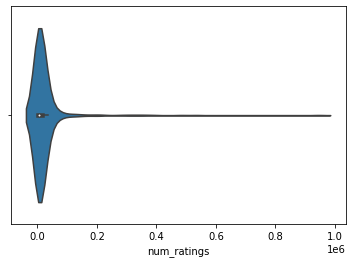

In [20]:
# explore num_ratings
sns.violinplot(x=df4["num_ratings"])
df4['num_ratings'].describe()

count     501.000000
mean       83.265469
std       182.906543
min         2.000000
25%         9.000000
50%        25.000000
75%        68.000000
max      2154.000000
Name: author_num_unique_books, dtype: float64

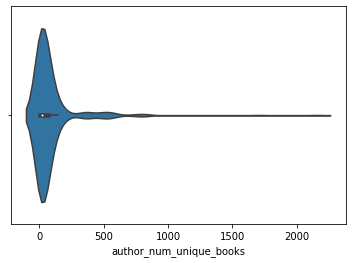

In [21]:
# explore num_ratings
sns.violinplot(x=df4["author_num_unique_books"])
df4['author_num_unique_books'].describe()

265


count    265.000000
mean      11.822642
std        7.534432
min        2.000000
25%        5.000000
50%       10.000000
75%       18.000000
max       29.000000
Name: author_num_unique_books, dtype: float64

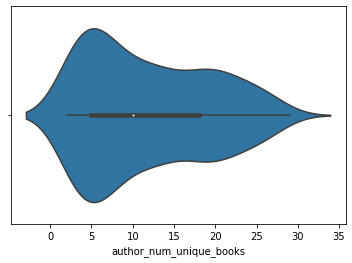

In [24]:
# remove authors of more than 50 books
df5 = df4[df4['author_num_unique_books']<30]
sns.violinplot(x=df5["author_num_unique_books"])
print(len(df5.index))
df5['author_num_unique_books'].describe()

In [29]:
# sum the genres
df_percent_genre = df5.copy()
genre_cols = []
for coli in df_percent_genre.columns:
    if "genre_" in coli: genre_cols.append(coli)

df_percent_genre['sum_genres'] = df5[df5.columns[6::]].sum(axis=1)
df_percent_genre.head()

['genre_20th-century', 'genre_21st-century', 'genre_abuse', 'genre_academic', 'genre_activism', 'genre_adoption', 'genre_adult', 'genre_adult-fiction', 'genre_adventure', 'genre_africa', 'genre_african-american', 'genre_alcohol', 'genre_amazon', 'genre_american', 'genre_ancient', 'genre_ancient-history', 'genre_animals', 'genre_anthologies', 'genre_anthropology', 'genre_anti-racist', 'genre_art', 'genre_art-design', 'genre_atheism', 'genre_audiobook', 'genre_australia', 'genre_autobiography', 'genre_basketball', 'genre_biblical', 'genre_biography', 'genre_biography-memoir', 'genre_biology', 'genre_book-club', 'genre_books-about-books', 'genre_brain', 'genre_british-literature', 'genre_buddhism', 'genre_buisness', 'genre_business', 'genre_canada', 'genre_catholic', 'genre_chess', 'genre_chick-lit', 'genre_childrens', 'genre_china', 'genre_christian', 'genre_christian-fiction', 'genre_christian-living', 'genre_christian-non-fiction', 'genre_christianity', 'genre_church', 'genre_classics'

,avg_rating,num_ratings,year_published,book_review_count,author_num_unique_books,kindle_price,book_description,genre_20th-century,genre_21st-century,genre_abuse,...,topic 11,topic 12,topic 13,topic 14,topic 15,topic 16,topic 17,topic 18,topic 19,sum_genres
4,3.84,275462,2011.0,27998.0,18.0,9.99,Despite constant efforts to declutter your hom...,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12537.0
7,4.06,319847,2012.0,23496.0,4.0,9.99,The book that started the Quiet RevolutionAt l...,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21527.0
15,3.62,143658,2009.0,12652.0,21.0,11.99,Gretchen Rubin had an epiphany one rainy after...,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7061.0
26,3.92,79470,2014.0,6101.0,7.0,11.99,Nightline anchor Dan Harris embarks on an unex...,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4621.0
42,4.15,26219,2011.0,1781.0,9.0,13.99,The first book to explain the new science of s...,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3618.0


In [206]:
df_percent_genre['sum_genres'].describe()

count      292.000000
mean      1070.123288
std       1978.065958
min        102.000000
25%        285.000000
50%        483.000000
75%       1008.250000
max      21523.000000
Name: sum_genres, dtype: float64

In [207]:
# create genres percentage columns
columns_genre = list(df5.columns[6::])
for columni in columns_genre:
    df_percent_genre[columni+'_percent'] = df_percent_genre.apply(lambda x : x[columni]/x['sum_genres'],axis=1)
df_percent_genre.head()

,avg_rating,num_ratings,year_published,book_review_count,author_num_unique_books,kindle_price,genre_20th-century,genre_21st-century,genre_abuse,genre_academic,...,genre_true-crime_percent,genre_urban-planning_percent,genre_vegan_percent,genre_war_percent,genre_womens_percent,genre_womens-studies_percent,genre_world-war-ii_percent,genre_writing_percent,genre_young-adult_percent,genre_zen_percent
3,3.86,8980,2001.0,608.0,20.0,12.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.24,3752,2015.0,441.0,4.0,11.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.70,2570,2013.0,362.0,13.0,8.26,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,3.75,5161,2010.0,776.0,15.0,11.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,3.90,5484,1998.0,300.0,12.0,11.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
# create column for normalized num_ratings and review_count by years since published
# use only books from previous 2019 or older
df_out = df_percent_genre[(df_percent_genre['year_published']<2020)] #&(df_percent_genre['year_published']>2000)]
df_out['ratings_per_month_since_published'] = df_out.apply(lambda x : x['num_ratings']/(12*(2020-x['year_published'])),axis=1)
df_out['reviews_per_month_since_published'] = df_out.apply(lambda x : x['book_review_count']/(12*(2020-x['year_published'])),axis=1)
df_out.head()

C:\Users\valer\anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\valer\anaconda3\envs\insight\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,avg_rating,num_ratings,year_published,book_review_count,author_num_unique_books,kindle_price,genre_20th-century,genre_21st-century,genre_abuse,genre_academic,...,genre_vegan_percent,genre_war_percent,genre_womens_percent,genre_womens-studies_percent,genre_world-war-ii_percent,genre_writing_percent,genre_young-adult_percent,genre_zen_percent,ratings_per_month_since_published,reviews_per_month_since_published
3,3.86,8980,2001.0,608.0,20.0,12.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.385965,2.666667
6,4.24,3752,2015.0,441.0,4.0,11.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.533333,7.350000
8,3.70,2570,2013.0,362.0,13.0,8.26,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.595238,4.309524
21,3.75,5161,2010.0,776.0,15.0,11.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.008333,6.466667
22,3.90,5484,1998.0,300.0,12.0,11.99,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.772727,1.136364


count    288.000000
mean      21.855771
std       55.034042
min        0.154762
25%        2.172991
50%        6.102328
75%       15.767361
max      546.250000
Name: reviews_per_month_since_published, dtype: float64

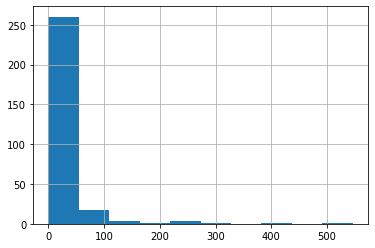

In [209]:
df_out['reviews_per_month_since_published'].hist()
df_out['reviews_per_month_since_published'].describe()

count    189.000000
mean       3.687949
std        2.843360
min        0.154762
25%        1.291667
50%        2.763889
75%        5.916667
max        9.992424
Name: reviews_per_month_since_published, dtype: float64

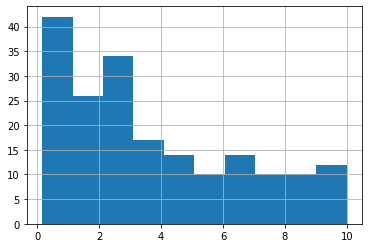

In [221]:
num_reviews_per_month_cut=20
df_out[df_out['reviews_per_month_since_published']<num_reviews_per_month_cut]['reviews_per_month_since_published'].hist()
df_out[df_out['reviews_per_month_since_published']<num_reviews_per_month_cut]['reviews_per_month_since_published'].describe()

In [217]:
df_out = df_out[df_out['reviews_per_month_since_published']<num_reviews_per_month_cut]

<AxesSubplot:xlabel='reviews_per_month_since_published'>

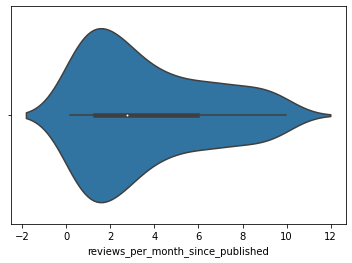

In [223]:
sns.violinplot(x=df_out["reviews_per_month_since_published"])

In [218]:
means = []
colnames_small = []
count = 0
for i in df_out.columns:
    if not "percent" in i: continue
    try:
        means.append(df_out[i].mean())
        if df_out[i].mean() < 1e-02: 
            count += 1
            colnames_small.append(i)
    except:
        continue
print(len(means),count,count/len(means), np.median(means),np.mean(means),np.min(means),np.max(means))

243 229 0.9423868312757202 4.899078973153047e-05 0.004115226337448561 0.0 0.27916113604386045


Note that 30% of the features are genres are less than 1e-5, and the median is 7e-5. Let's clean the data more

In [219]:
df_out2 = df_out.drop(colnames_small,axis=1)
print(len(df_out2.index),len(df_out2.columns))

189 266


<AxesSubplot:xlabel='genre_productivity_percent'>

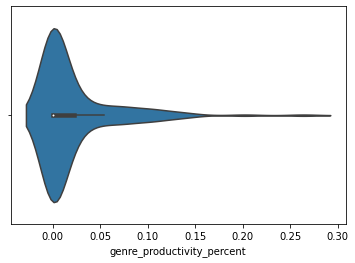

In [231]:
sns.violinplot(x=df_out2["genre_productivity_percent"])

In [220]:
df_out2.to_csv('../data/books_25_pages_clean0.csv',index=False)